In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from glob import glob
import fitsio as ft

In [3]:
def make_hp(nside, hpix, val, fill=0.0):
    
    map_ = np.zeros(12*nside*nside)
    map_[:] = fill
    map_[hpix] = val
    
    return map_

def prepare(weight):
    
    table = ft.read(weight) 
    
    vlow, vhigh = np.percentile(table['weight'], [1, 99])
    print(vlow, vhigh)
    val = table['weight'].clip(vlow, vhigh)
    map_ = make_hp(256, table['hpix'], val.mean(axis=1))
    
    count_ = (map_ > 0)*1.0
    
    return map_, count_


def merge_weights(weights, nside):
    
    npix = 12*nside*nside
    weight_map = np.zeros(npix)
    count_map = np.zeros(npix)

    for weight in weights:

        map_, count_ = prepare(weight)

        weight_map += map_
        count_map += count_
        
    is_good = count_map > 0.0
    
    selection = np.zeros_like(weight_map)
    selection[:] = hp.UNSEEN
    selection[is_good] = weight_map[is_good]/count_map[is_good]
        
    return selection

# LRGs
These are selection functions trained with imaging maps in NSIDE=256.

In [4]:
lrgweights = glob('/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/0.57.0/dnn_lrg_*_256/nn-weights.fits')
lrgweights

['/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/0.57.0/dnn_lrg_bmzls_256/nn-weights.fits',
 '/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/0.57.0/dnn_lrg_ndecals_256/nn-weights.fits',
 '/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/0.57.0/dnn_lrg_sdecals_256/nn-weights.fits']

In [5]:
maps = {}
maps['nn_lrg_256_0.57.0'] = merge_weights(lrgweights, 256)

38.500505027771 47.51949012756347
38.66448207855225 47.98804550170897
38.0889826965332 47.89374851226806


In [7]:
lrgweights = glob('/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/1.0.0/dnn_lrg_*_256/nn-weights.fits')
lrgweights

['/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/1.0.0/dnn_lrg_bmzls_256/nn-weights.fits',
 '/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/1.0.0/dnn_lrg_ndecals_256/nn-weights.fits',
 '/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/1.0.0/dnn_lrg_sdecals_256/nn-weights.fits']

In [8]:
maps['nn_lrg_256_1.0.0'] = merge_weights(lrgweights, 256)

28.939529228210453 35.96536190032958
29.054967708587643 36.52447536468505
28.753325748443604 36.466521720886234


## ELGs
These are ELG selection functions trained with imaging maps in NSIDE=256.

In [9]:
elgweights = glob('/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/0.57.0/dnn_elg_*s_256/nn-weights.fits')
elgweights

['/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/0.57.0/dnn_elg_bmzls_256/nn-weights.fits',
 '/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/0.57.0/dnn_elg_ndecals_256/nn-weights.fits',
 '/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/0.57.0/dnn_elg_sdecals_256/nn-weights.fits']

In [10]:
maps['nn_elg_256_0.57.0'] = merge_weights(elgweights, 256)

94.19245735168457 153.42856597900385
110.29792243957519 162.1872196960449
107.56603118896484 169.1918537902831


In [11]:
elgweights = glob('/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/1.0.0/dnn_elg_*s_256/nn-weights.fits')
elgweights

['/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/1.0.0/dnn_elg_bmzls_256/nn-weights.fits',
 '/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/1.0.0/dnn_elg_ndecals_256/nn-weights.fits',
 '/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/1.0.0/dnn_elg_sdecals_256/nn-weights.fits']

In [12]:
maps['nn_elg_256_1.0.0'] = merge_weights(elgweights, 256)

94.19245735168457 153.42856597900385
110.29792243957519 162.1872196960449
107.56603118896484 169.1918537902831


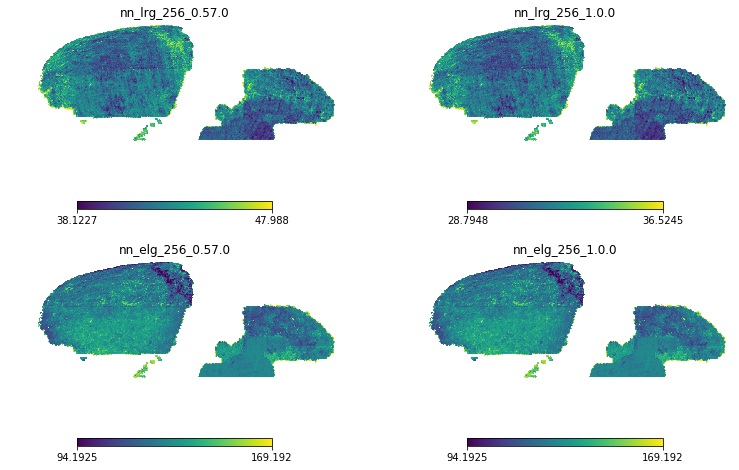

In [14]:
fg, ax = plt.subplots(ncols=2, nrows=2, figsize=(14, 8))
fg.subplots_adjust(wspace=0.0)
ax = ax.flatten()


for i, (title, sel) in enumerate(maps.items()):
    
    plt.sca(ax[i])
    hp.mollview(sel, rot=(120, ), hold=True, title=title, badcolor='w')

In [15]:
for i, (title, sel) in enumerate(maps.items()):
    filename = f'selection_{title}.npy'
    np.save(filename, sel, allow_pickle=False)
    print(f'wrote {filename}')

wrote selection_nn_lrg_256_0.57.0.npy
wrote selection_nn_lrg_256_1.0.0.npy
wrote selection_nn_elg_256_0.57.0.npy
wrote selection_nn_elg_256_1.0.0.npy


## Reading

In [16]:
lrg_ = np.load('selection_nn_lrg_256_0.57.0.npy')

In [17]:
lrg_

array([-1.6375e+30, -1.6375e+30, -1.6375e+30, ..., -1.6375e+30,
       -1.6375e+30, -1.6375e+30])

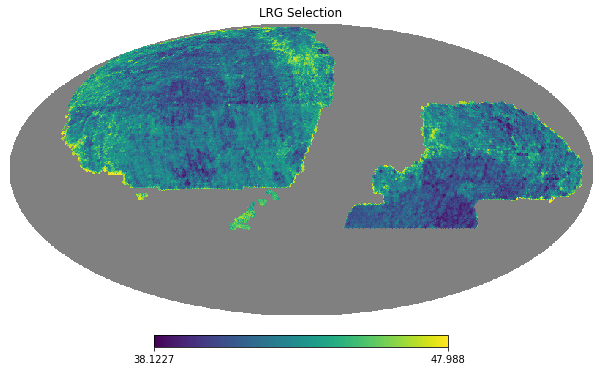

In [19]:
hp.mollview(lrg_, title='LRG Selection', rot=120)